In [15]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

sys.path.append("../src")

In [16]:
from gentopo.topology.families import families
from gentopo.topology.measures import SmallWorldReference

reference_graphs = SmallWorldReference([14, 16, 18, 20, 22], 3, 4, 5)
reference_graphs.generate()

# nx.draw_networkx(lattice_graph, nx.circular_layout(lattice_graph))
reference_graphs.lattice_topology

{14: <networkx.classes.graph.Graph at 0x117a0edd0>,
 16: <networkx.classes.graph.Graph at 0x117a05960>,
 18: <networkx.classes.graph.Graph at 0x117b767d0>,
 20: <networkx.classes.graph.Graph at 0x117a06a10>,
 22: <networkx.classes.graph.Graph at 0x117a10220>}

In [10]:
nx.average_degree_connectivity(reference_graphs.random_topology[14])

{4: 4.0}

In [11]:
random_graph = nx.random_reference(lattice_graph, niter=20)
nx.draw_networkx(random_graph, nx.circular_layout(random_graph))

NameError: name 'lattice_graph' is not defined

In [6]:
from gentopo.topology import measures
import numpy as np


Lrand = nx.average_shortest_path_length(random_graph)
Clatt = nx.average_clustering(lattice_graph)


insufficient = True
while insufficient:
    graph = families.connected_small_world(20, 4, 0.5, 5)
    degrees = [deg for (node, deg) in graph.degree()]
    omega = measures.omega(graph, Lrand, Clatt)
    conditions = {
        "degree": [min(degrees), max(degrees)] == [3, 5],
        "omega": 0.4 <= omega <= 0.6,
    }

    if all(conditions.values()):
        small_world_graph = graph.copy()
        insufficient = False


print(degrees)
print(np.mean(degrees))
print(nx.average_degree_connectivity(small_world_graph))
print(omega)
nx.draw_networkx(small_world_graph, nx.circular_layout(small_world_graph))

NameError: name 'random_graph' is not defined

In [7]:
graph = small_world_graph
degrees = [deg for (node, deg) in graph.degree()]
print(len(graph.edges))
print(degrees)

import random
from itertools import chain

rounds = 5
dyads = [(u, v) for (u, v) in graph.edges]
print(omega)
interaction_sequence = []

# This is 8 for n = 16
ideal_matching_size = round(len(graph.nodes()) / 2)
tries = 1000 * ideal_matching_size
tries_since_ideal_matching = 0

print(f"Total available dyads: {len(dyads)}")

while tries:
    matching = dict()
    matching["edges"] = set()
    matching["edges"].add(random.choice(dyads))
    matching["nodes"] = set(chain(*matching["edges"]))

    for dyad in dyads:
        u, v = dyad
        if u not in matching["nodes"] and v not in matching["nodes"]:
            matching["edges"].add((u, v))
            matching["nodes"].update({u, v})

    if len(matching["edges"]) == ideal_matching_size:
        # Check if this matching would leave any participants with 2 or more skips

        interaction_sequence.append(matching)
        print("Matching added to sequence")
        for edge in matching["edges"]:
            dyads.remove(edge)
        print(f"{len(dyads)} remain for matching")
        if len(interaction_sequence) == rounds:
            break

    if tries_since_ideal_matching > 1000:
        ideal_matching_size -= 1
        print(f"new ideal matching size: {ideal_matching_size}")
        tries_since_ideal_matching = 0

    tries -= 1
    tries_since_ideal_matching += 1

print(f"Interaction sequence for {rounds} rounds found:")
interaction_sequence

NameError: name 'small_world_graph' is not defined

In [73]:
# Validate interaction sequence by nodes present in sequence without 2+ skips in edges
_n = 20

# All nodes present in first matching
if len(interaction_sequence[0]["nodes"]) < _n:
    print("problem")
# If sequence is 1 or 2 rounds, it's okay by default?
if len(interaction_sequence) < 3:
    print("it's okay! No need to do anything")
# If 3 or more rounds, start checking for skips beyond one round
previous_two_matchings = interaction_sequence[:2]
# TODO: Handle situation where a node's edges have all been used?
for matching in interaction_sequence[2:]:
    for node in matching["nodes"]:
        # If in most recent round, no issue and continue
        if node in previous_two_matchings[1]["nodes"]:
            continue
        # If not in most recent round, check second most
        if node in previous_two_matchings[0]["nodes"]:
            continue
        # If in neither, big issue
        else:
            # TODO
            print(f"Node {node} not found in previous two matchings")
            break
    previous_two_matchings[0] = previous_two_matchings[1]
    previous_two_matchings[1] = matching

In [74]:
previous_two_matchings

[{'edges': {(0, 14), (1, 18), (2, 3), (6, 8), (9, 10), (13, 15), (16, 17)},
  'nodes': {0, 1, 2, 3, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18}},
 {'edges': {(0, 5), (6, 15), (8, 9), (17, 19)},
  'nodes': {0, 5, 6, 8, 9, 15, 17, 19}}]

In [75]:
nx.average_degree_connectivity(random_graph)

{4: 4.0}

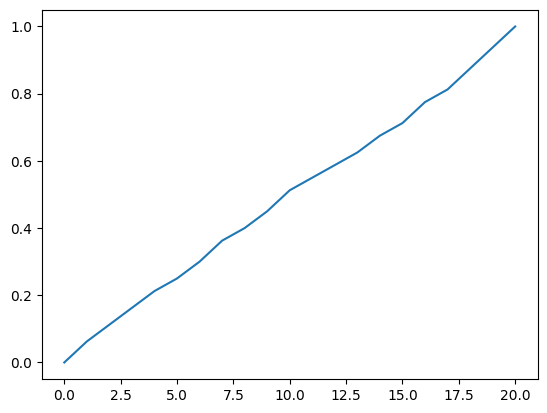

In [76]:
from networkx.utils import cumulative_distribution

keys, degrees = zip(*small_world_graph.degree())
plt.plot(cumulative_distribution(degrees))

In [81]:
nx.average_shortest_path_length(random_graph)

2.136842105263158